<a href="https://colab.research.google.com/github/ArindamBanerji/wip-experiments/blob/master/keras/dog_cat_campusx-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:16<00:00, 71.3MB/s]
100% 1.06G/1.06G [00:16<00:00, 68.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import ( Dense,
                          Conv2D,
                          MaxPooling2D,
                          Flatten,
                          BatchNormalization,
                          Dropout ) 

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

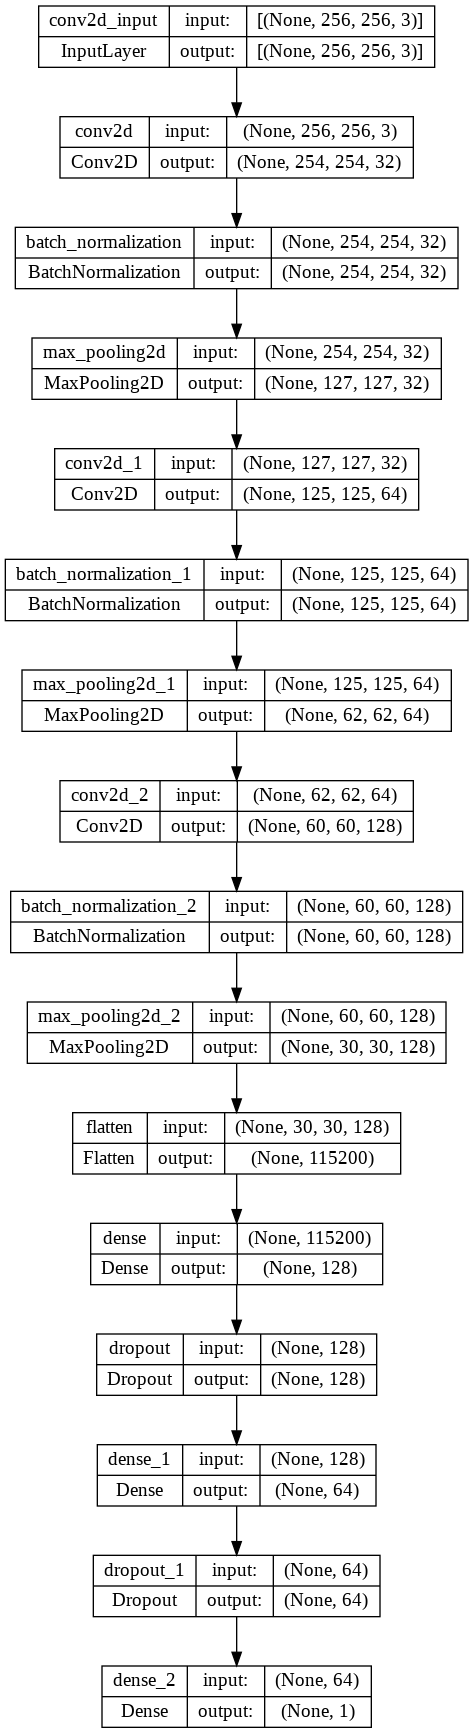

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1012 - accuracy: 0.9681 - val_loss: 0.6494 - val_accuracy: 0.7974
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.6217 - val_accuracy: 0.7854
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.6650 - val_accuracy: 0.8124
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.9624 - val_accuracy: 0.8278
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 1.5589 - val_accuracy: 0.8106
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 2.9203 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.8900 - val_ac

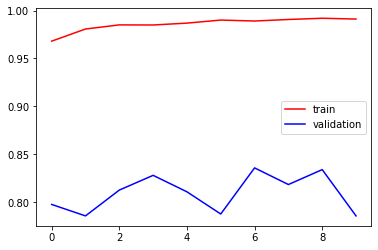

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

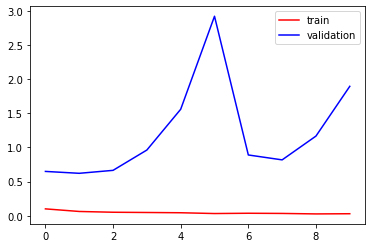

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat1.jpg')
test_img2 = cv2.imread('/content/dog2.jpg')
test_img3 = cv2.imread('/content/dog1.jpg')

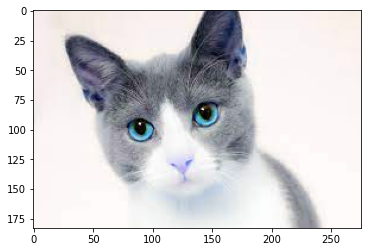

In [ ]:
plt.imshow(test_img)

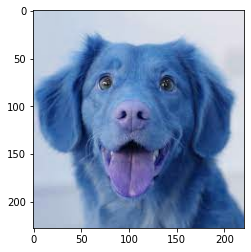

In [ ]:
plt.imshow(test_img2)

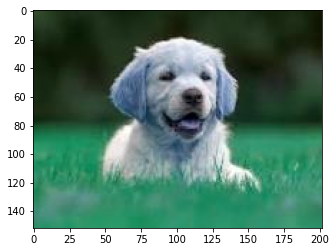

In [ ]:
plt.imshow(test_img3)

In [ ]:
test_img.shape

(183, 276, 3)

In [ ]:
test_img2.shape

(228, 221, 3)

In [ ]:
test_img3.shape

(152, 202, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_img2 = cv2.resize(test_img2,(256,256))
test_img3 = cv2.resize(test_img3,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))
test_input2 = test_img2.reshape((1,256,256,3))
test_input3 = test_img3.reshape((1,256,256,3))

In [ ]:
predictions = model.predict(test_input)
predictions_2 = model.predict(test_input2)
predictions_3 = model.predict(test_input3)

1/1 [==============================] - 0s 15ms/step


In [ ]:
print(predictions)
print (predictions_2)
print (predictions_3)

[[0.]]
[[1.]]
[[1.]]


In [ ]:
score = predictions[0]
score2 = predictions_2[0]
score3 = predictions_3[0]

print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score2), 100 * score2)
)

print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score3), 100 * score3)
)

This image is 100.00 percent cat and 0.00 percent dog.
This image is 0.00 percent cat and 100.00 percent dog.
This image is 0.00 percent cat and 100.00 percent dog.
